# Working with FilmsDS

In [213]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

## Получение данных

In [214]:
Data=pd.read_csv('data_new.csv')
Data.head()

,Title,Year,Score,Genre,Vote,Director,Runtime,Revenue,Oscar,Guild,Globe,total,nominee,win
0,'71,2014,7.2,"Action, Drama, Thriller",44532,Yann Demange,99,1.27,-1.0,-1.0,-1.0,-1.0,False,False
1,'A' gai wak,1983,7.4,"Action, Comedy",12657,Jackie Chan,105,NaN,-1.0,-1.0,-1.0,-1.0,False,False
2,'A' gai wak 2,1987,7.2,"Action, Comedy, Crime",7739,Jackie Chan,101,NaN,-1.0,-1.0,-1.0,-1.0,False,False
3,'I Know Where I'm Going!',1945,7.6,"Drama, Romance",6861,Michael Powell,91,NaN,-1.0,-1.0,-1.0,-1.0,False,False
4,(T)Raumschiff Surprise - Periode 1,2004,5.4,"Comedy, Sci-Fi",12158,Michael Herbig,87,NaN,-1.0,-1.0,-1.0,-1.0,False,False


## Визуальный анализ данных

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

In [216]:
# Для того чтобы проанализировать столбец с жанрами, необходимо оставить в строке по одному жанру
Data['Genre'] = Data['Genre'].apply(lambda x: x.split(',')[0])

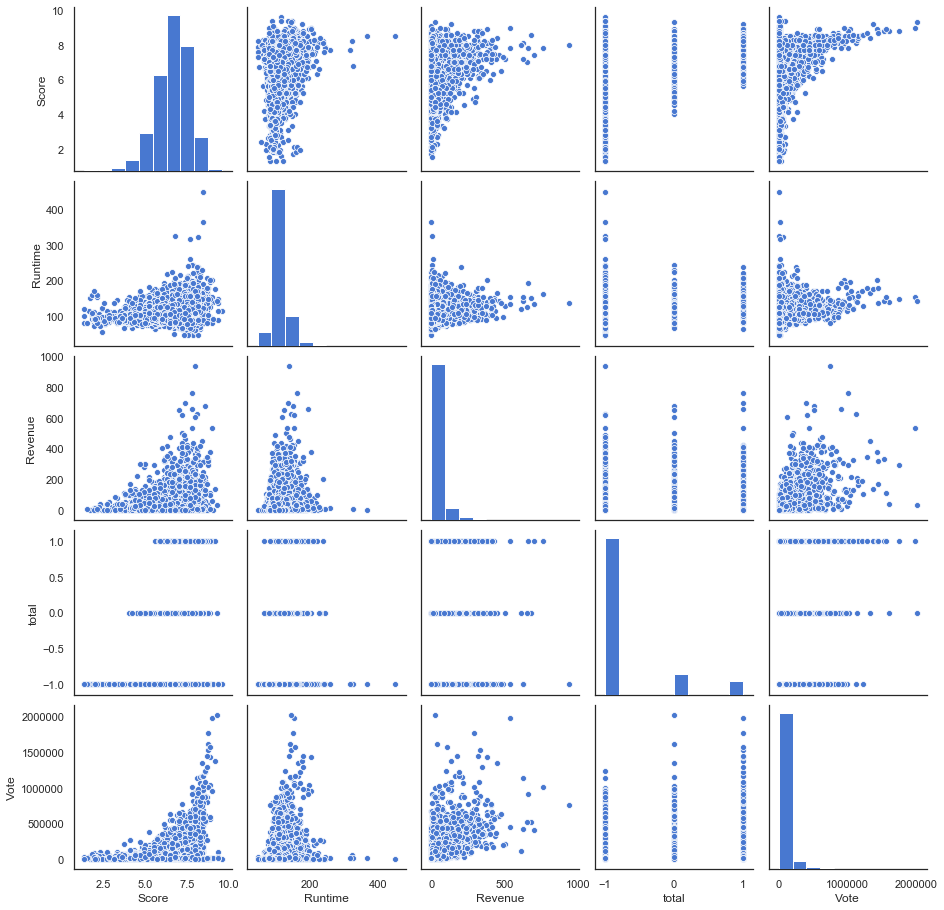

In [217]:
#Построение графиков зависимости
attributes = ['Score', 'Runtime', 'Revenue', 'total','Vote']
sns_plot=sns.pairplot(Data[attributes])
sns_plot.savefig('dependences.png')

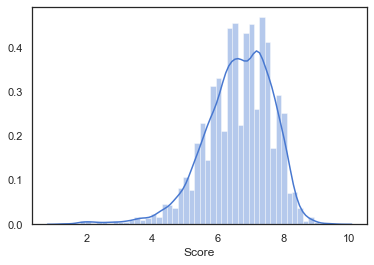

In [218]:
sns.distplot(Data.Score)

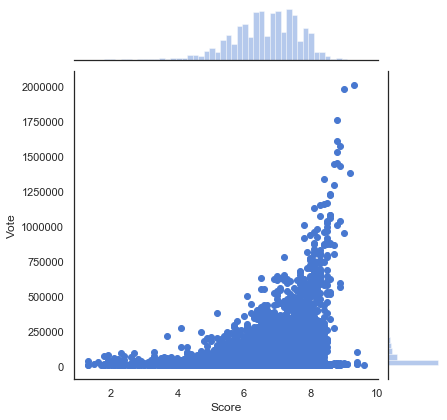

In [219]:
sns.jointplot(Data.Score, Data.Vote)

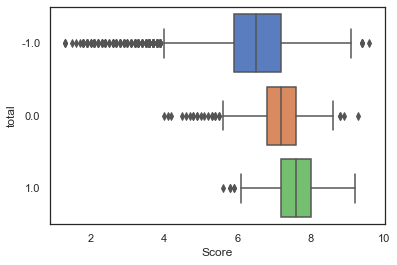

In [220]:
sns.boxplot(y="total", x="Score", data=Data, orient="h")

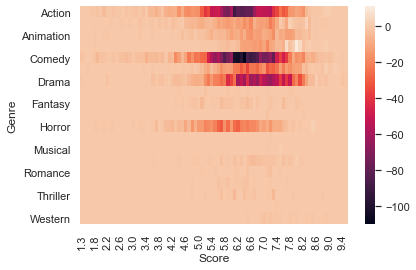

In [221]:
info = Data.pivot_table(
                        index='Genre', 
                        columns='Score', 
                        values='total', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(info)

## Работа с различными методами классификации

In [222]:
Data=Data.dropna()
from sklearn.model_selection import train_test_split
train, test = train_test_split(Data, test_size=0.3)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242 entries, 5885 to 8710
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     2242 non-null   object 
 1   Year      2242 non-null   int64  
 2   Score     2242 non-null   float64
 3   Genre     2242 non-null   object 
 4   Vote      2242 non-null   int64  
 5   Director  2242 non-null   object 
 6   Runtime   2242 non-null   int64  
 7   Revenue   2242 non-null   float64
 8   Oscar     2242 non-null   float64
 9   Guild     2242 non-null   float64
 10  Globe     2242 non-null   float64
 11  total     2242 non-null   float64
 12  nominee   2242 non-null   bool   
 13  win       2242 non-null   bool   
dtypes: bool(2), float64(6), int64(3), object(3)
memory usage: 232.1+ KB


In [223]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train = train[['Score', 'Vote','Revenue']]
y_train =train.total
X_test = test[['Score', 'Vote','Revenue']]
y_test =test.total

In [224]:
tree = DecisionTreeClassifier(max_depth=15)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
print(metrics.classification_report(y_test, tree_pred))
print("accuracy:",accuracy_score(y_test, tree_pred))

              precision    recall  f1-score   support

        -1.0       0.86      0.87      0.87      1772
         0.0       0.25      0.23      0.24       297
         1.0       0.33      0.32      0.33       173

    accuracy                           0.75      2242
   macro avg       0.48      0.47      0.48      2242
weighted avg       0.74      0.75      0.74      2242

accuracy: 0.7462087421944692


In [225]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(metrics.classification_report(y_test, knn_pred))
print("accuracy:",accuracy_score(y_test, knn_pred))

              precision    recall  f1-score   support

        -1.0       0.81      0.97      0.88      1772
         0.0       0.23      0.06      0.10       297
         1.0       0.45      0.09      0.15       173

    accuracy                           0.78      2242
   macro avg       0.50      0.37      0.38      2242
weighted avg       0.70      0.78      0.72      2242

accuracy: 0.7809991079393399


In [226]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(metrics.classification_report(y_test, rfc_pred))
print("accuracy:",accuracy_score(y_test, rfc_pred))

              precision    recall  f1-score   support

        -1.0       0.85      0.94      0.89      1772
         0.0       0.26      0.14      0.18       297
         1.0       0.44      0.31      0.36       173

    accuracy                           0.78      2242
   macro avg       0.51      0.46      0.48      2242
weighted avg       0.74      0.78      0.75      2242

accuracy: 0.7818911685994647


In [227]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)
print(metrics.classification_report(y_test, lg_pred))
#print(metrics.confusion_matrix(y_test, lg_pred,labels=[1,0,-1]))
print("accuracy:",accuracy_score(y_test, lg_pred))

              precision    recall  f1-score   support

        -1.0       0.80      0.99      0.89      1772
         0.0       0.26      0.03      0.05       297
         1.0       0.58      0.09      0.15       173

    accuracy                           0.79      2242
   macro avg       0.55      0.37      0.36      2242
weighted avg       0.71      0.79      0.72      2242

accuracy: 0.7925958965209634


In [228]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('Expcted', size = 18)
    plt.xlabel('Predicted', size = 18)


Confusion matrix, without normalization
[[1550  155   67]
 [ 185   67   45]
 [  72   45   56]]
Confusion matrix, without normalization
[[1717   45   10]
 [ 270   19    8]
 [ 138   20   15]]
Confusion matrix, without normalization
[[1657   79   36]
 [ 222   42   33]
 [  78   41   54]]
Confusion matrix, without normalization
[[1753   14    5]
 [ 282    9    6]
 [ 146   12   15]]


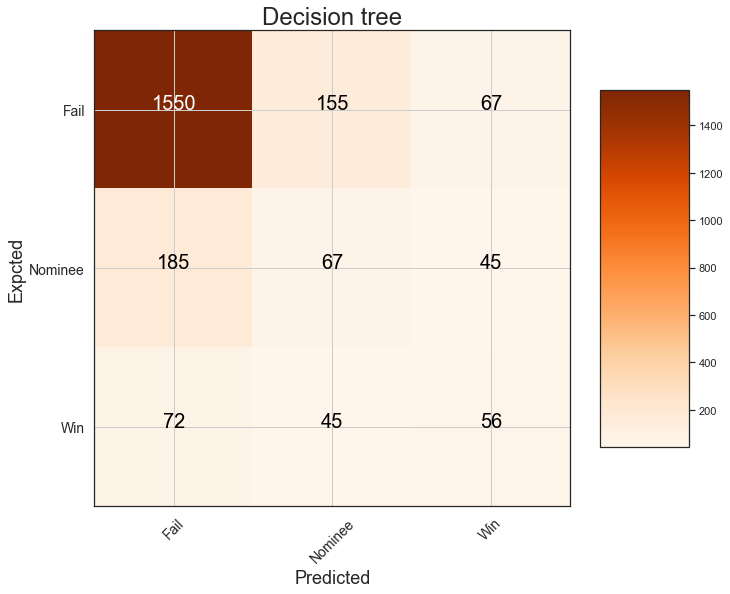

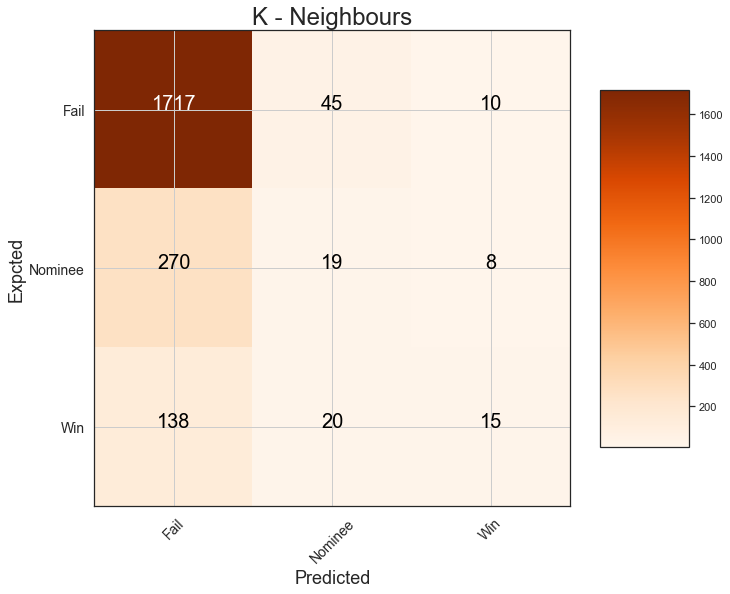

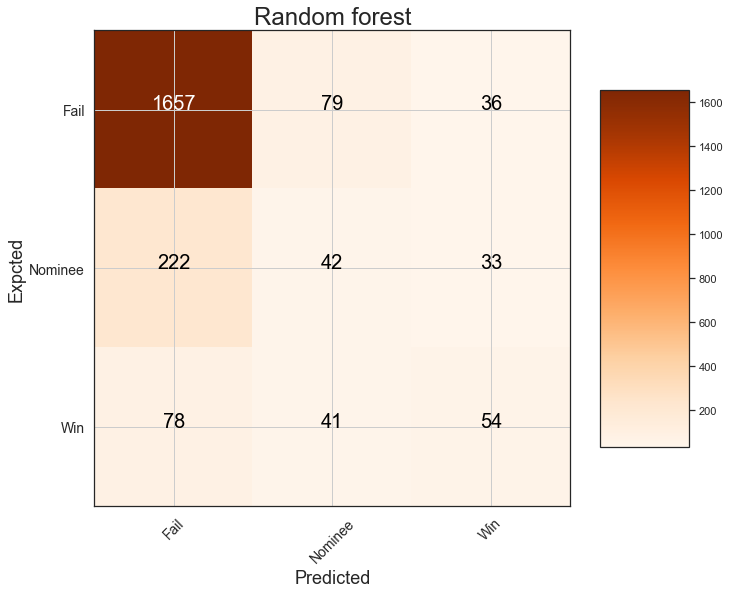

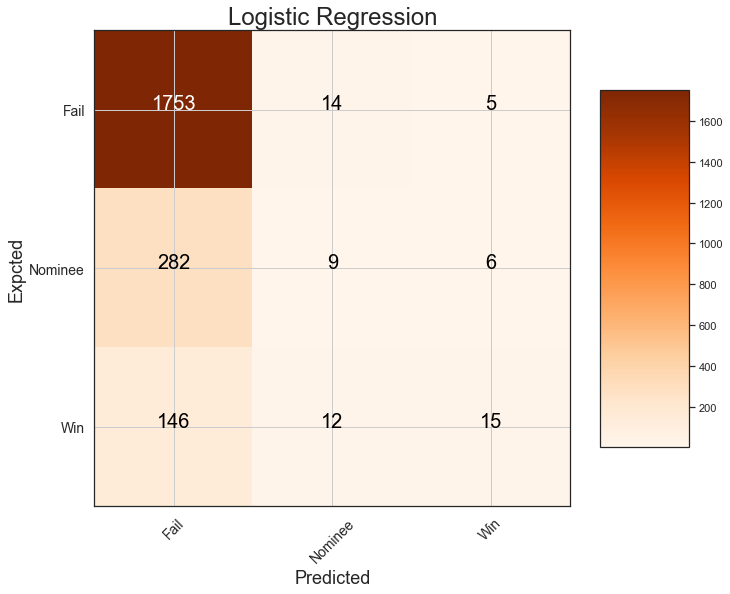

In [229]:
ax=plot_confusion_matrix(metrics.confusion_matrix(y_test, tree_pred), classes = ['Fail', 'Nominee','Win'],
                      title = 'Decision tree')
ax =plot_confusion_matrix(metrics.confusion_matrix(y_test, knn_pred), classes = ['Fail', 'Nominee','Win'],
                      title = 'K - Neighbours')
ax =plot_confusion_matrix(metrics.confusion_matrix(y_test, rfc_pred), classes = ['Fail', 'Nominee','Win'],
                      title = 'Random forest')
ax =plot_confusion_matrix(metrics.confusion_matrix(y_test, lg_pred), classes = ['Fail', 'Nominee','Win'],
                      title = 'Logistic Regression')

                Tree                          KNN                              RFC                        LR


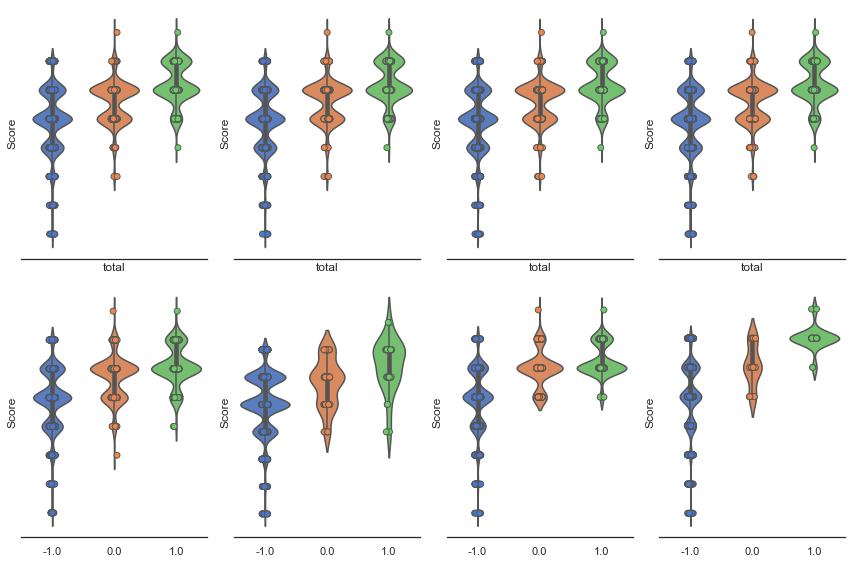

In [230]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 4, figsize=(12,8), sharex=True)
sns.despine(left=True)
print("                Tree                          KNN                              RFC                        LR")
sns.violinplot(y_test,test.Score//1,ax=axes[0, 0])
sns.stripplot(y_test,test.Score//1, jitter=0.05, size=6, linewidth=.9, ax=axes[0, 0])

sns.violinplot(tree_pred,test.Score//1, ax=axes[1, 0])
sns.stripplot(tree_pred,test.Score//1, jitter=0.05, size=6, linewidth=.9, ax=axes[1, 0])

sns.violinplot(y_test,test.Score//1,ax=axes[0, 1])
sns.stripplot(y_test,test.Score//1, jitter=0.05, size=6, linewidth=.9, ax=axes[0, 1])

sns.violinplot(knn_pred,test.Score//1, ax=axes[1, 1])
sns.stripplot(knn_pred,test.Score//1, jitter=0.05, size=6, linewidth=.9, ax=axes[1, 1])

sns.violinplot(y_test,test.Score//1,ax=axes[0, 2])
sns.stripplot(y_test,test.Score//1, jitter=0.05, size=6, linewidth=.9, ax=axes[0, 2])

sns.violinplot(rfc_pred,test.Score//1, ax=axes[1, 2])
sns.stripplot(rfc_pred,test.Score//1, jitter=0.05, size=6, linewidth=.9, ax=axes[1, 2])

sns.violinplot(y_test,test.Score//1,ax=axes[0, 3])
sns.stripplot(y_test,test.Score//1, jitter=0.05, size=6, linewidth=.9, ax=axes[0, 3])

sns.violinplot(lg_pred,test.Score//1, ax=axes[1, 3])
sns.stripplot(lg_pred,test.Score//1, jitter=0.05, size=6, linewidth=.9, ax=axes[1, 3])

plt.setp(axes, yticks=[])
plt.tight_layout()

#### Из-за плохого отличия номинации от победы, было решено отменить деление на 3 класса

## Преобразование в задачу бинарной классификации - Наличие или отсутствие премии

In [204]:
y_train =train.win
y_test =test.win
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
lg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)

print("Tree:")
print(metrics.classification_report(y_test, tree_pred))
print("accuracy:",accuracy_score(y_test, tree_pred))
print("KNN:")
print(metrics.classification_report(y_test, knn_pred))
print("accuracy:",accuracy_score(y_test, knn_pred))
print("Random forest:")
print(metrics.classification_report(y_test, rfc_pred))
print("accuracy:",accuracy_score(y_test, rfc_pred))
print("LogReg:")
print(metrics.classification_report(y_test, lg_pred))
print("accuracy:",accuracy_score(y_test, lg_pred))

Tree:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95      2079
        True       0.36      0.37      0.36       163

    accuracy                           0.91      2242
   macro avg       0.65      0.66      0.66      2242
weighted avg       0.91      0.91      0.91      2242

accuracy: 0.9063336306868867
KNN:
              precision    recall  f1-score   support

       False       0.93      0.99      0.96      2079
        True       0.41      0.09      0.15       163

    accuracy                           0.92      2242
   macro avg       0.67      0.54      0.56      2242
weighted avg       0.89      0.92      0.90      2242

accuracy: 0.9241748438893844
Random forest:
              precision    recall  f1-score   support

       False       0.95      0.98      0.96      2079
        True       0.54      0.28      0.37       163

    accuracy                           0.93      2242
   macro avg       0.74      0.63      0.66 

Confusion matrix, without normalization
[[1972  107]
 [ 103   60]]
Confusion matrix, without normalization
[[2057   22]
 [ 148   15]]
Confusion matrix, without normalization
[[2041   38]
 [ 118   45]]
Confusion matrix, without normalization
[[2074    5]
 [ 156    7]]


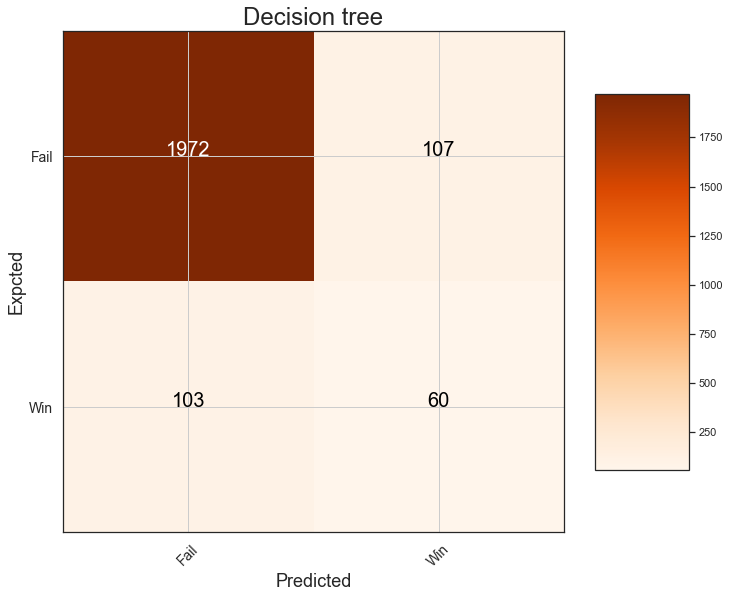

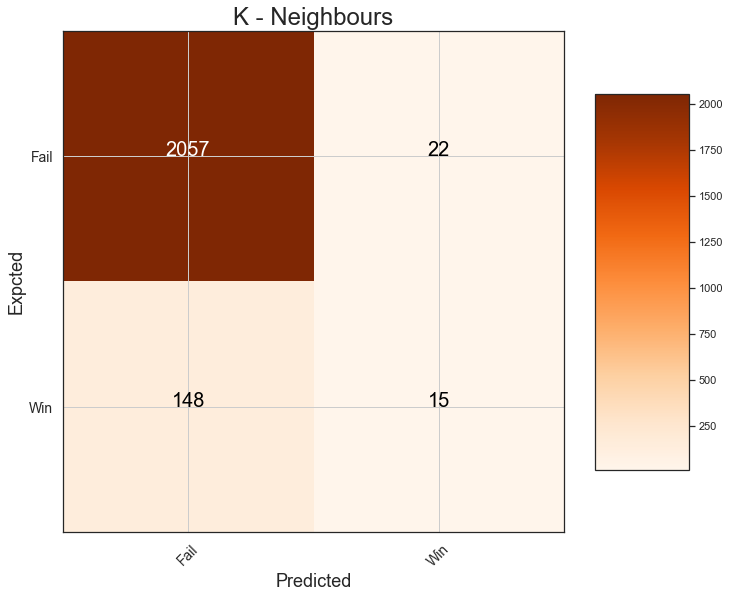

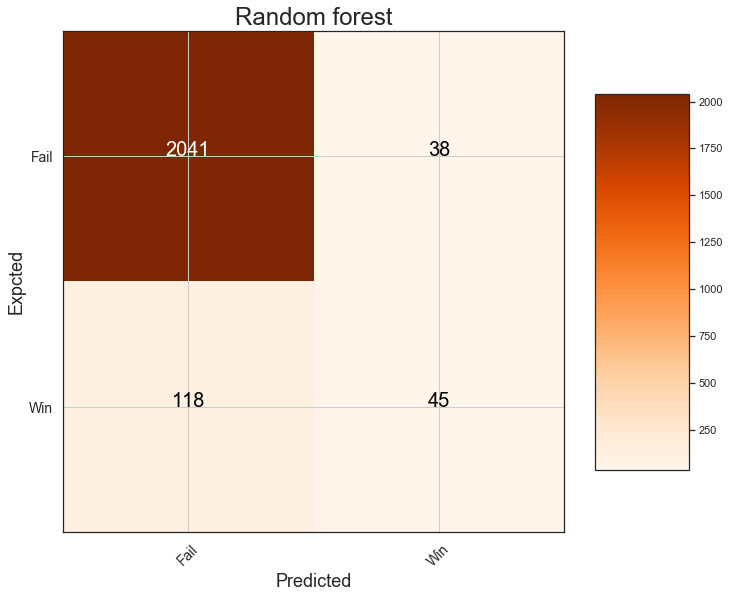

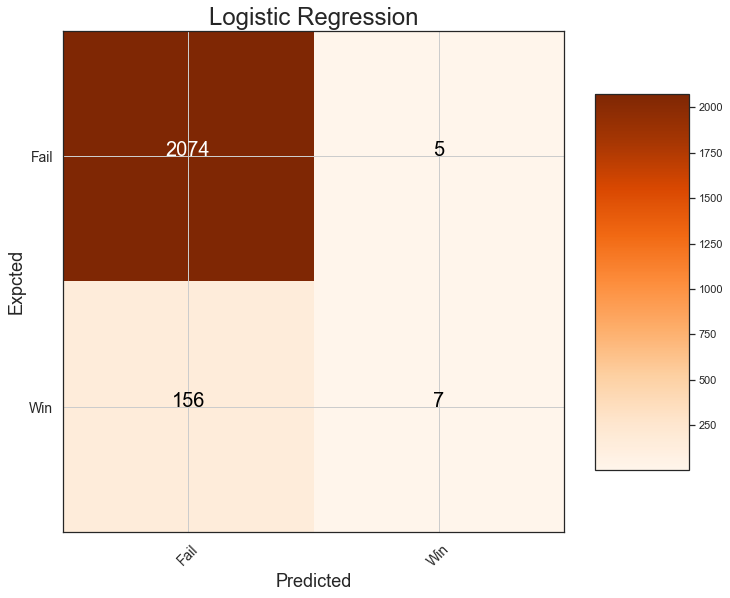

In [205]:
ax=plot_confusion_matrix(metrics.confusion_matrix(y_test, tree_pred), classes = ['Fail', 'Win'],
                      title = 'Decision tree')
ax =plot_confusion_matrix(metrics.confusion_matrix(y_test, knn_pred), classes = ['Fail','Win'],
                      title = 'K - Neighbours')
ax =plot_confusion_matrix(metrics.confusion_matrix(y_test, rfc_pred), classes = ['Fail','Win'],
                      title = 'Random forest')
ax =plot_confusion_matrix(metrics.confusion_matrix(y_test, lg_pred), classes = ['Fail','Win'],
                      title = 'Logistic Regression')

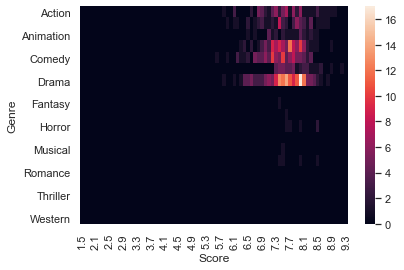

In [206]:
info = Data.pivot_table(
                        index='Genre', 
                        columns='Score', 
                        values='win', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(info)

AUC Tree: 0.703
AUC KNN: 0.625
AUC RFC: 0.860
AUC LR: 0.490


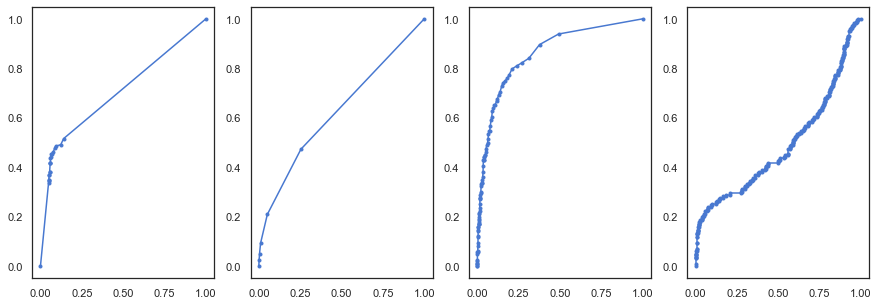

In [207]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))
probs = tree.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC Tree: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
ax1.plot(fpr, tpr, marker='.')
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC KNN: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
ax2.plot(fpr, tpr, marker='.')
probs = rfc.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC RFC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
ax3.plot(fpr, tpr, marker='.')
probs = lg.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC LR: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
ax4.plot(fpr, tpr, marker='.')
plt.show()

# Преобразование в задачу бинарной классификации - Наличие или отсутствие номинации на премию

In [208]:
y_train =train.nominee
y_test =test.nominee
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
lg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)

print("Tree:")
print(metrics.classification_report(y_test, tree_pred))
print("accuracy:",accuracy_score(y_test, tree_pred))
print("KNN:")
print(metrics.classification_report(y_test, knn_pred))
print("accuracy:",accuracy_score(y_test, knn_pred))
print("Random forest:")
print(metrics.classification_report(y_test, rfc_pred))
print("accuracy:",accuracy_score(y_test, rfc_pred))
print("LogReg:")
print(metrics.classification_report(y_test, lg_pred))
print("accuracy:",accuracy_score(y_test, lg_pred))

Tree:
              precision    recall  f1-score   support

       False       0.87      0.88      0.87      1794
        True       0.48      0.46      0.47       448

    accuracy                           0.79      2242
   macro avg       0.67      0.67      0.67      2242
weighted avg       0.79      0.79      0.79      2242

accuracy: 0.7934879571810883
KNN:
              precision    recall  f1-score   support

       False       0.83      0.95      0.88      1794
        True       0.49      0.21      0.29       448

    accuracy                           0.80      2242
   macro avg       0.66      0.58      0.59      2242
weighted avg       0.76      0.80      0.76      2242

accuracy: 0.7983942908117752
Random forest:
              precision    recall  f1-score   support

       False       0.87      0.92      0.89      1794
        True       0.58      0.44      0.50       448

    accuracy                           0.82      2242
   macro avg       0.72      0.68      0.70 

Confusion matrix, without normalization
[[1573  221]
 [ 242  206]]
Confusion matrix, without normalization
[[1696   98]
 [ 354   94]]
Confusion matrix, without normalization
[[1654  140]
 [ 253  195]]
Confusion matrix, without normalization
[[1760   34]
 [ 397   51]]


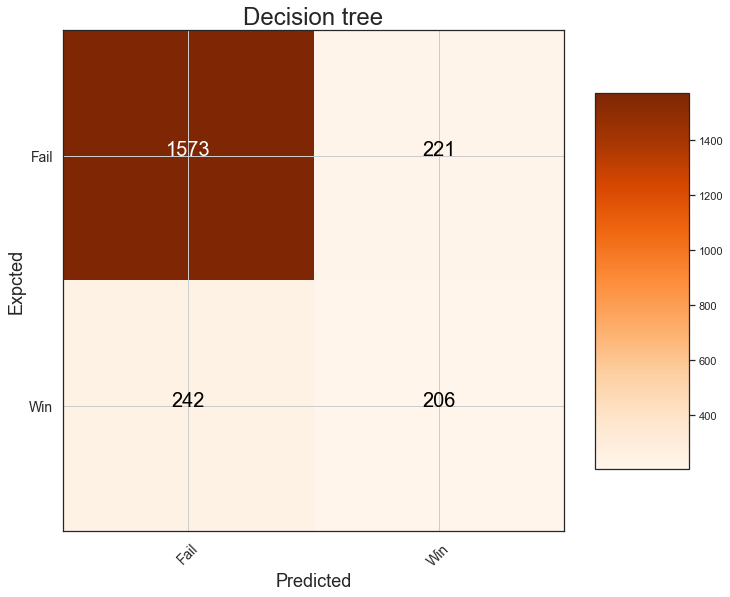

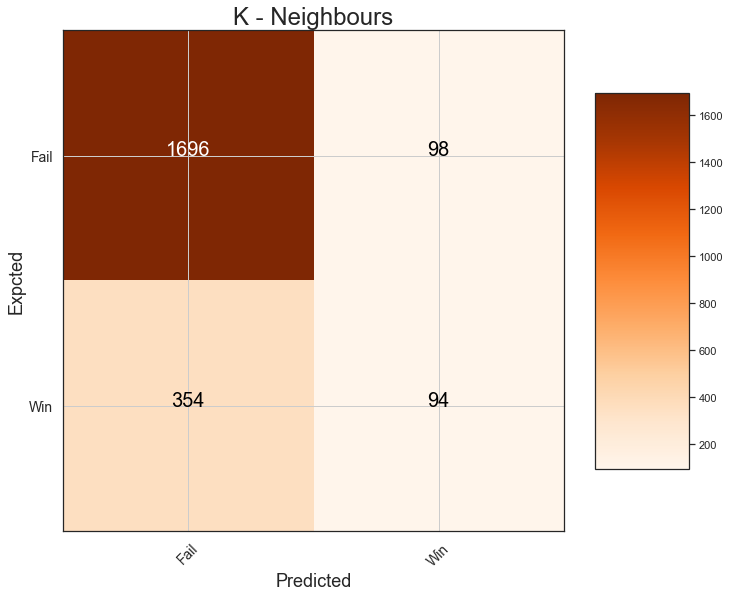

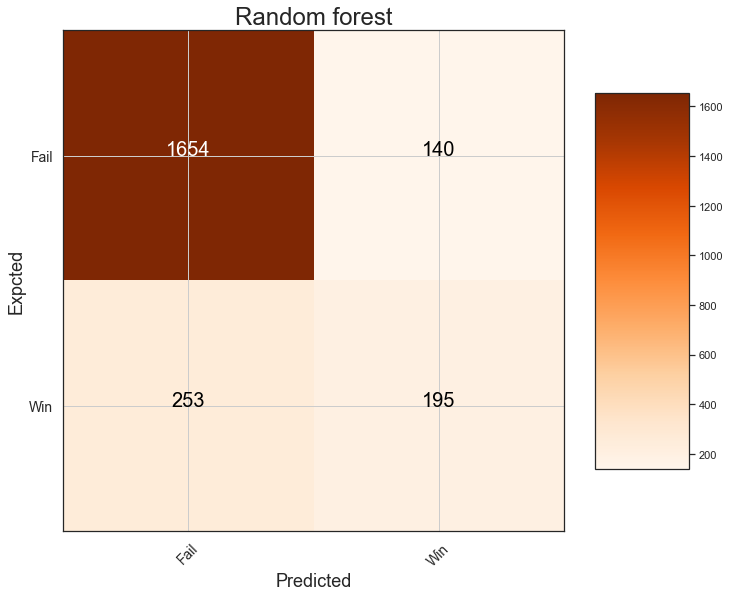

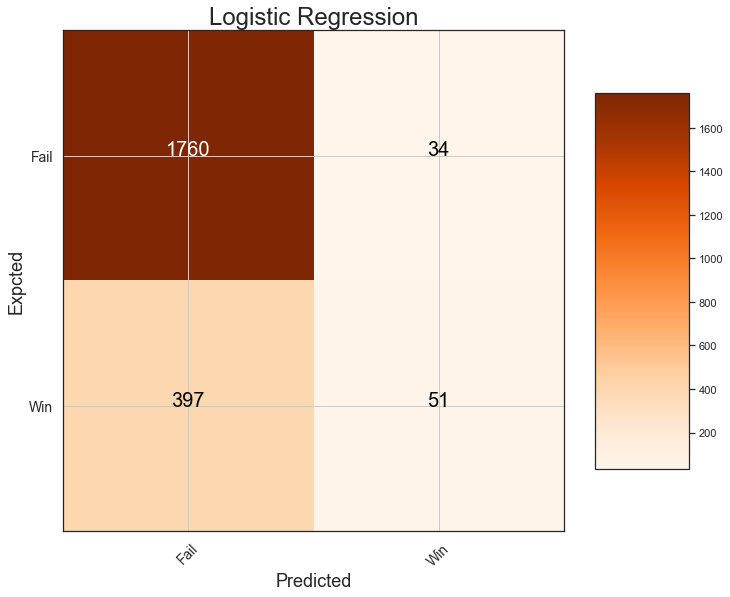

In [209]:
ax=plot_confusion_matrix(metrics.confusion_matrix(y_test, tree_pred), classes = ['Fail', 'Win'],
                      title = 'Decision tree')
ax =plot_confusion_matrix(metrics.confusion_matrix(y_test, knn_pred), classes = ['Fail','Win'],
                      title = 'K - Neighbours')
ax =plot_confusion_matrix(metrics.confusion_matrix(y_test, rfc_pred), classes = ['Fail','Win'],
                      title = 'Random forest')
ax =plot_confusion_matrix(metrics.confusion_matrix(y_test, lg_pred), classes = ['Fail','Win'],
                      title = 'Logistic Regression')

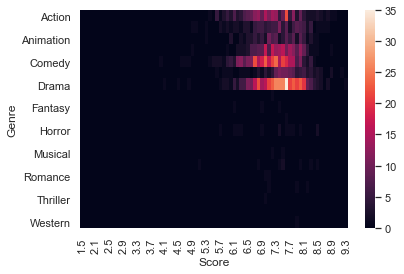

In [210]:
info = Data.pivot_table(
                        index='Genre', 
                        columns='Score', 
                        values='nominee', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(info)

AUC Tree: 0.677
AUC KNN: 0.616
AUC RFC: 0.820
AUC LR: 0.553


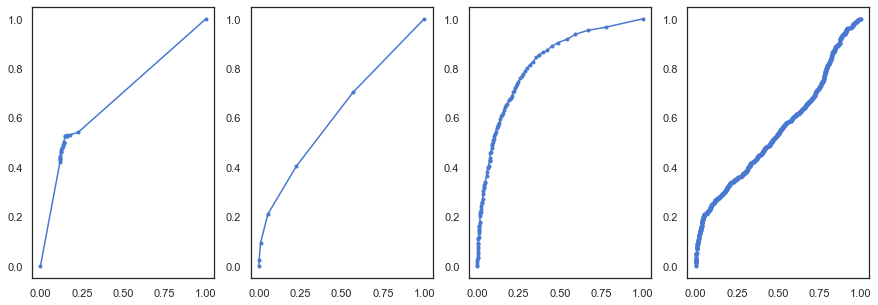

In [211]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))
probs = tree.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC Tree: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
ax1.plot(fpr, tpr, marker='.')
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC KNN: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
ax2.plot(fpr, tpr, marker='.')
probs = rfc.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC RFC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
ax3.plot(fpr, tpr, marker='.')
probs = lg.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC LR: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
ax4.plot(fpr, tpr, marker='.')
plt.show()